## Observations and Insights 

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')
print(f" Combined Data Shape: {combined_data.shape}")

# Display the data table for preview
combined_data.head()




 Combined Data Shape: (1893, 8)


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [30]:
# Checking the number of mice.
#mouse_count = combined_data['Mouse ID'].value_counts()
#mouse_count

#mouse_group = combined_data.groupby('Mouse ID')
#mouse_group.head()

mouse_count = combined_data['Mouse ID'].nunique()
mouse_count

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup_mouse_time = mouse_group['Timepoint'].count()
#dup_mouse_time

#alternative
unique_mousetime = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)
unique_mousetime.shape

(1883, 8)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseids = combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)
print(combined_data[dup_mouseids])



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#inside list rows of index numbers that will be dropped
mouse_drop = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)
print(mouse_drop.shape)

(1880, 8)


In [42]:
# Checking the number of mice in the clean DataFrame.
mouse_drop['Mouse ID'].nunique()

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']]

meanbydrug = mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
meanbydrug

medianbydrug = mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()
medianbydrug

variancebydrug = mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()
variancebydrug

stdbydrug = mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()
stdbydrug

sembydrug = mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
sembydrug
#type(sembydrug['Tumor Volume (mm3)'])
#type(sembydrug)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summarystats = pd.DataFrame({'Mean Volume (mm3) by Drug' : meanbydrug['Tumor Volume (mm3)'],
                             'Median Volume (mm3) by Drug' : medianbydrug['Tumor Volume (mm3)'],
                             'Variance Volume (mm3) by Drug' : variancebydrug['Tumor Volume (mm3)'],
                             'Standard Deviation Volume (mm3) by Drug' : stdbydrug['Tumor Volume (mm3)'],
                             'Standard Error of Mean Volume (mm3) by Drug' : sembydrug['Tumor Volume (mm3)']})
#previously we were defining the DF using the dictionary and values need to be series so data was returning full dataframe 
#instead we looked at the dictionary and pull volume column which is a series
#scalar values is not a list or non vector 
summarystats


Mean Volume (mm3) by Drug  Median Volume (mm3) by Drug  \
Drug Regimen                                                           
Capomulin                     40.675741                    41.557809   
Ceftamin                      52.591172                    51.776157   
Infubinol                     52.884795                    51.820584   
Ketapril                      55.235638                    53.698743   
Naftisol                      54.331565                    52.509285   
Placebo                       54.033581                    52.288934   
Propriva                      52.320930                    50.446266   
Ramicane                      40.216745                    40.673236   
Stelasyn                      54.233149                    52.431737   
Zoniferol                     53.236507                    51.818479   

              Variance Volume (mm3) by Drug  \
Drug Regimen                                  
Capomulin                         24.947764   
Ceftamin                          39.290177   
Infubinol                         43.128684   
Ketapril                          68.553577   
Naftisol                          66.173479   
Placebo                           61.168083   
Propriva                          43.852013   
Ramicane                          23.486704   
Stelasyn                          59.450562   
Zoniferol                         48.533355   

              Standard Deviation Volume (mm3) by Drug  \
Drug Regimen                                            
Capomulin                                    4.994774   
Ceftamin                                     6.268188   
Infubinol                                    6.567243   
Ketapril                                     8.279709   
Naftisol                                     8.134708   
Placebo                                      7.821003   
Propriva                                     6.622085   
Ramicane                                     4.846308   
Stelasyn                                     7.710419   
Zoniferol                                    6.966589   

              Standard Error of Mean Volume (mm3) by Drug  
Drug Regimen                                               
Capomulin                                        0.329346  
Ceftamin                                         0.469821  
Infubinol                                        0.492236  
Ketapril                                         0.603860  
Naftisol                                         0.596466  
Placebo                                          0.581331  
Propriva                                         0.544332  
Ramicane                                         0.320955  
Stelasyn                                         0.573111  
Zoniferol                                        0.516398

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#.agg = aggregates a list of functions on columns
# This method produces everything in a single groupby function
#mean etc in pandas known command
aggregated_df= mouse_drop[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar')


In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#plt.bar(mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique()['Mouse ID'],mouse_drop.groupby('Drug Regimen').nunique().index)      

#plt.bar(mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique().values,mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique().index)

plt.bar(x= mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique().index,height = mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique().values)

plt.xticks(rotation=90)

#review format
# mice_per_drug_df = mouse_drop.groupby('Drug Regimen')['Mouse ID'].nunique()
# x = mice_per_drug_df.index
# y = mice_per_drug_df.values

# plt.bar(x = x, height = y)
# plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

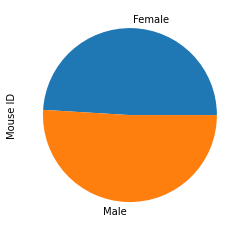

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_drop.groupby('Sex').count()['Mouse ID'].plot(kind='pie')


([<matplotlib.patches.Wedge at 0x1b8288918e0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Females'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

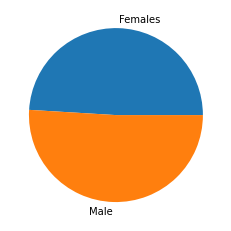

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_drop.groupby('Sex').count()['Mouse ID'], labels=['Females', 'Male'])




## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_drop[['Timepoint', 'Mouse ID']].groupby('Mouse ID').max()
max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_maxandoriginal = max_timepoint.merge(mouse_drop, on=['Mouse ID', 'Timepoint'], how='inner')
merged_maxandoriginal

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data =[]
#.to-list takes series and puts into list

for treatment in treatments:
    tumor_data = tumor_data + merged_maxandoriginal[merged_maxandoriginal['Drug Regimen']== treatment]['Tumor Volume (mm3)'].to_list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quantiles = np.quantile(tumor_data, [.25,.5,.75])
quantiles

#variable for each range
Q1 = quantiles[0]
Q3 = quantiles[2]
#variable for interquartile range
iqr = Q3 - Q1
iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = Q1 - (1.25*iqr)
upper_bound = Q3 + (1.25*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#make note of others

Values below 8.759596361874983 could be outliers.
Values above 88.35840919562501 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1b827da6af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b827da6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b827da6df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b827da5eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b827da5a30>],
 'means': []}

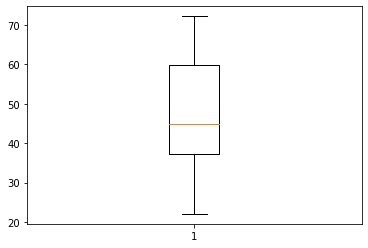

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data)

## Line and Scatter Plots

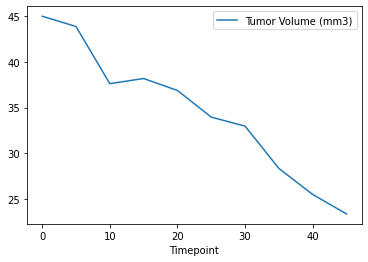

In [100]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_drop[mouse_drop['Mouse ID']== 's185'].plot(x='Timepoint', y= 'Tumor Volume (mm3)')

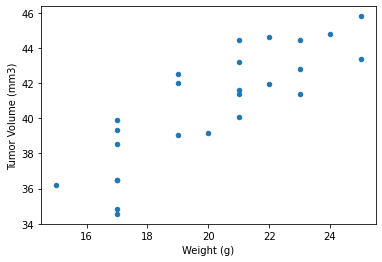

In [106]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
means= mouse_drop[mouse_drop['Drug Regimen']== 'Capomulin'].groupby('Mouse ID').mean()
means.plot.scatter(x='Weight (g)', y= 'Tumor Volume (mm3)')

## Correlation and Regression

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = means['Weight (g)']
y_values = means["Tumor Volume (mm3)"]

#linregress provides the 5 values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(rvalue)
linregress(x_values, y_values)
 #rvalue is high so high correlated between 2 pieces of data vs p value tests the statistical significance of something not a pair of data
#regress_values = x_values * slope + intercept

#plt.scatter(x_values, y_values, alpha=0.8)
#plt.plot(x_values, regress_values, "red")

0.8419363424694718


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)